In [141]:
import matplotlib.pyplot as plt
import pandas as pd

### With 100 points, three cases:

1. Ideal
2. Gaussian noise
3. Uniform noise

we have created a dataset with 100 points. The relation we want to investigate is

$$
2.5382 cos(x)+x^2-0.5
$$

In [142]:
import numpy as np

#X = 5 * np.random.randn(100, 5)
X = 5 * np.random.randn(100,1)
a = 2 #weight for noise
#y = 2.5382 * np.cos(X[:,3]) + X[:,0] ** 2 - 0.5 
y = 2.5382 * np.cos(X) + X ** 2 - 0.5 
n = y + a*np.random.randn(100,1)
u = y + a*np.random.rand(100,1)

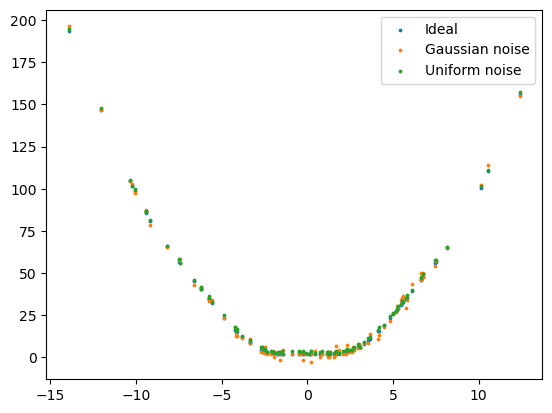

In [143]:
plt.scatter(X,y, label='Ideal', s=3)
plt.scatter(X,n, label='Gaussian noise', s=3)
plt.scatter(X,u, label='Uniform noise', s=3)
plt.legend()

from pysr import PySRRegressor

model = PySRRegressor(
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)    
    procs=8,
)

In [144]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "sin",
        "exp",
        "log",
    ],
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)    
    warm_start=True,
    turbo=True,
    #batching=True, not so useful for this example
)

## 1. Ideal


In [145]:
model.fit(X, y)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick      score                                           equation  \
	0         0.000000                                          27.028288   
	1         2.985342                                          (x0 * x0)   
	2         0.036129                          ((x0 * x0) + -0.49486268)   
	3         0.814595                              ((x0 * x0) + cos(x0))   
	4         0.877756                ((x0 * x0) + (cos(x0) * 2.5361526))   
	5  >>>>  11.973101  (((x0 * x0) + (cos(x0) * 2.5382001)) + -0.5000...   
	
	           loss  complexity  
	0  1.375739e+03           1  
	1  3.511567e+00           3  
	2  3.266781e+00           5  
	3  1.446592e+00           6  
	4  2.499980e-01           8  
	5  9.959394e-12          10  
]

In [146]:
p_1 = model.predict(X)
l_1 = model.latex()
print(l_1)

x_{0}^{2} + 2.54 \cos{\left(x_{0} \right)} - 0.500


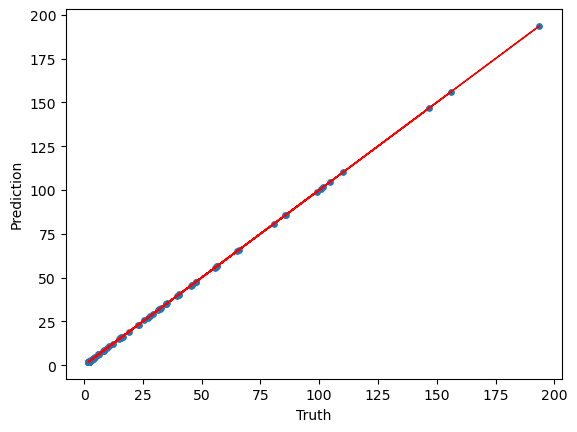

In [147]:
plt.scatter(y, p_1,s=15)
plt.plot(y,y, color='r', lw=1)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()

## 2. Gaussian noise


In [148]:
model.fit(X,n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          27.162018   
	1         2.635663                                          (x0 * x0)   
	2         0.009332                          ((x0 * x0) + -0.36481264)   
	3   >>>>  0.318761                              ((x0 * x0) + cos(x0))   
	4         0.131990                ((x0 * x0) + (2.5332427 * cos(x0)))   
	5         0.011809           ((x0 * x0) + (sin(cos(x0)) * 2.8308425))   
	6         0.023440  ((x0 * x0) + ((2.5332427 * cos(x0)) + -0.35242...   
	7         0.010256  (((x0 * x0) + -0.4235515) + (sin(cos(x0)) * 2....   
	8         0.000353  (((x0 * x0) + sin(-0.4235515)) + (sin(cos(x0))...   
	9         0.000122  ((((x0 * x0) + -0.48495585) + (sin(cos(x0)) * ...   
	10        0.011275  (((x0 * x0) + -0.36684215) + (cos(x0) * exp(co...   
	11        0.000135  ((((x0 * x0) + cos(-0.36684215)) + -1.280522) ...   
	
	           loss  complexity  
	0   1401.626200           1  
	1      7.199872           3  
	2      7.066738           5  
	3      5.137865           6  
	4      3.945821           8  
	5      3.899498           9  
	6      3.809156          10  
	7      3.770288          11  
	8      3.768959          12  
	9      3.768497          13  
	10     3.726245          14  
	11     3.724740          17  
]

In [149]:
p_2 = model.predict(X)
l_2 = model.latex()
print(l_2)

x_{0}^{2} + \cos{\left(x_{0} \right)}


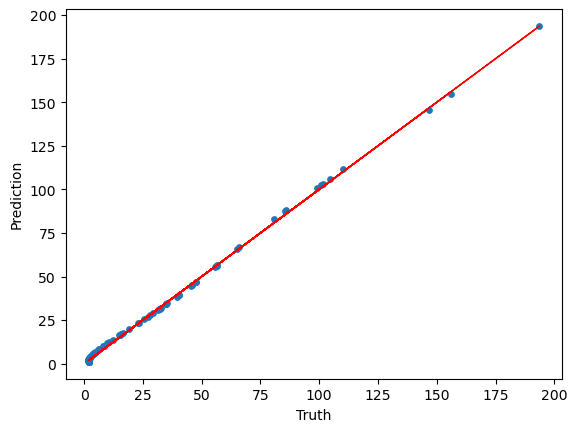

In [150]:
plt.scatter(y, p_2,s=15)
plt.plot(y,y, color='r', lw=1)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()

## 3. Uniform noise

In [151]:
model.fit(X,u)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick         score                                           equation  \
	0        0.000000e+00                                          28.040813   
	1        2.910651e+00                                          (x0 * x0)   
	2        3.403627e-02                           ((x0 * x0) + 0.51774037)   
	3        6.796516e-01                              ((x0 * x0) + cos(x0))   
	4        5.782944e-01                ((x0 * x0) + (cos(x0) * 2.6143706))   
	5  >>>>  2.834413e-01  (((x0 * x0) + (2.6122797 * cos(x0))) + 0.5122715)   
	6        5.086611e-08  (((x0 * x0) + (((1.0117661 * sin(0.348321)) + ...   
	
	          loss  complexity  
	0  1374.028000           1  
	1     4.072266           3  
	2     3.804281           5  
	3     1.927985           6  
	4     0.606462           8  
	5     0.344041          10  
	6     0.344040          18  
]

In [152]:
p_3 = model.predict(X)
l_3 = model.latex()
print(l_3)

x_{0}^{2} + 2.61 \cos{\left(x_{0} \right)} + 0.512


## Comparison beetween ideal and noised

Gaussian

In [166]:
d_1 = y-n 
d_2 = p_1-p_2

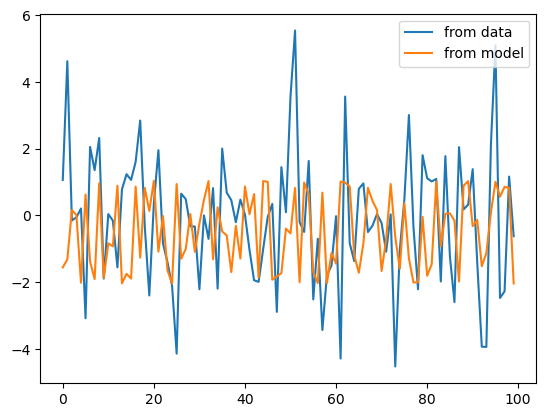

In [168]:
plt.plot(d_1, label='from data')
plt.plot(d_2, label='from model')
plt.legend()

seems that the model reduces the discrepances

Uniform

In [169]:
r_1 = y-u
r_2 = p_1-p_3

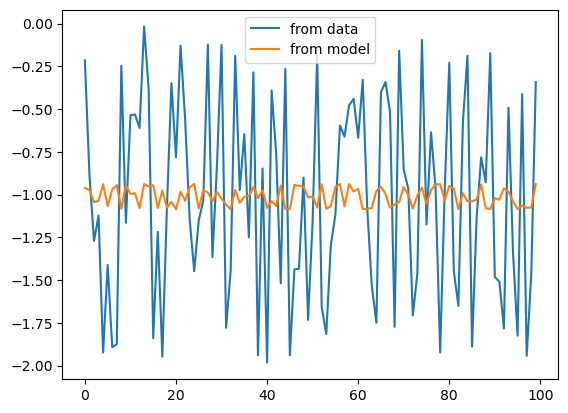

In [170]:
plt.plot(r_1, label='from data')
plt.plot(r_2, label='from model')
plt.legend()